# Basic Recurrent Neural Network

## Part 1 - Data Pre-Processing

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Part 2 - Building the RNN

Importing the libraries

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/home/bhanuka/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Initalising the RNN

In [7]:
regressor = Sequential()

Adding the First LSTM layer and some Dropout Regularization

In [8]:
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

Adding the Second LSTM layer and some Dropout Regularization

In [9]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

Adding the Third LSTM layer and some Dropout Regularization

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

Adding the Fourth LSTM layer and some Dropout Regularization

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

Adding the output layer

In [12]:
regressor.add(Dense(units=1))

Compiling the RNN

In [13]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

Adding the tensorboard

In [14]:
from keras.callbacks import TensorBoard
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

Fitting the RNN

In [15]:
regressor.fit(X_train,
              y_train,
              epochs=100,
              verbose=1, 
              batch_size = 32,
              callbacks=[tensorboard]
             )

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0557
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0058
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0056
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - lo

## Part 3 - Making Predictions and visualising the results

Getting the real stock price of 2017

In [19]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

Pre-Processing before predecting

In [21]:
dataset_total = pd.concat(
    (dataset_train['Open'],dataset_test['Open']),
    axis=0
    )
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

Predicting the stock price of 2017

In [24]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualising the results

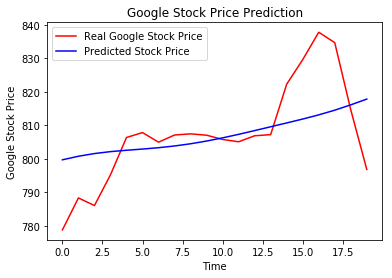

In [31]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()